In [1]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon
import seaborn as sns
sns.set(style="ticks")
from scipy import stats
import bokeh as bo

# Introduciton

1. <a href="#gather">Gathering Data Set</a>

2. <a href="#assess">Assessing Data Set</a>

3. <a href="#clean">Cleaning Data Set</a>

4. <a href="#analyze">Analyze Data Set</a>

5. <a href="#if">Inferential Statistics</a>

6. <a href="#findings">Main Findings</a>



# <span id="gather">Gathering Data Set</span>

Data Set available on Kaggle: <a href="https://www.kaggle.com/lava18/google-play-store-apps">Find Data Set</a>

In [2]:
df = pd.read_csv('googleplaystore.csv')
df_review = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_review.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Variable descritions df: 
<table>
   
   <colgroup>
        <col width="100">
        <col width="200">
   </colgroup>
	
    <tr>
		<th>Variable</th>
		<th>Description</th>
	</tr>
    
	<tr>
		<td>App</td>
		<td>Application name</td>
        
	</tr>
    	</tr>
	<tr>
		<td>Category</td>
		<td>Category the app belongs to</td>
	</tr>
    
            
	</tr>
    	</tr>
	<tr>
		<td>Rating</td>
		<td>Overall user rating of the app (as when scraped)</td>
	</tr>
        
        
	<tr>
		<td>Reviews</td>
		<td>Number of user reviews for the app (as when scraped)</td>
	</tr>
        
            

	<tr>
		<td>Size</td>
		<td>Size of the app (as when scraped)</td>
	</tr>
        
            
	<tr>
		<td>Installs</td>
		<td>Number of user downloads/installs for the app (as when scraped)</td>
	</tr>
            
            
	<tr>
		<td>Type</td>
		<td>Paid or Free</td>
	</tr>
            
         
	<tr>
		<td>Price</td>
		<td>Price of the app (as when scraped)</td>
	</tr>
            

	<tr>
		<td>Content Rating</td>
		<td>Age group the app is targeted at - Children / Mature 21+ / Adult</td>
	</tr>
                
	<tr>
		<td>GenresAn</td>
		<td> app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.</td> 
	</tr>

	<tr>
		<td>Last Updated</td>
		<td>Date when the app was last updated on Play Store (as when scraped)</td>
	</tr>
                

	<tr>
		<td>Current Ver</td>
		<td>Current version of the app available on Play Store (as when scraped)</td>
	</tr>
    
    <tr>
		<td>Android Ver</td>
		<td>Min required Android version (as when scraped)</td>
	</tr>
    
</table>




### Variable descritions df_review:

<table>
   
   <colgroup>
        <col width="100">
        <col width="200">
   </colgroup>
	
    <tr>
		<th>Variable</th>
		<th>Description</th>
	</tr>
    
	<tr>
		<td>Translated_Review</td>
		<td>User review (Preprocessed and translated to English)</td>
        
	</tr>
    	</tr>
	<tr>
		<td>Sentiment</td>
		<td>Positive/Negative/Neutral (Preprocessed)</td>
	</tr>
    
    <tr>
		<td>Sentiment_Polarity</td>
		<td>Sentiment polarity score</td>
	</tr>
    
    <tr>
		<td>Sentiment_Subjectivity</td>
		<td>Sentiment subjectivity score</td>
	</tr>

</table>





<style>
table { text-align: left }
</style>

# <span id="assess">Assessing Data Set</span>

## Programmatic Assessment

In [5]:
print('df data set has ', df.shape[0], 'rows and ', df.shape[1], 'columns')

df data set has  10841 rows and  13 columns


In [6]:
print('df_review data set has ', df_review.shape[0], 'rows and ', df_review.shape[1], 'columns')

df_review data set has  64295 rows and  5 columns


In [7]:
#get class for columns
def get_class(dataframe):
    for col in list(dataframe):
        print(col, type(dataframe[col][0]))

get_class(df)

App <class 'str'>
Category <class 'str'>
Rating <class 'numpy.float64'>
Reviews <class 'str'>
Size <class 'str'>
Installs <class 'str'>
Type <class 'str'>
Price <class 'str'>
Content Rating <class 'str'>
Genres <class 'str'>
Last Updated <class 'str'>
Current Ver <class 'str'>
Android Ver <class 'str'>


In [8]:
#get class for df_review data set
#type(df_review['Translated_Review'][0])
get_class(df_review)

App <class 'str'>
Translated_Review <class 'str'>
Sentiment <class 'str'>
Sentiment_Polarity <class 'numpy.float64'>
Sentiment_Subjectivity <class 'numpy.float64'>


In [9]:
#function value counts
def get_vc(dataframe, col):
    return df[col].value_counts()
    
get_vc(df, 'Current Ver')

Varies with device         1459
1.0                         809
1.1                         264
1.2                         178
2.0                         151
1.3                         145
1.0.0                       136
1.0.1                       119
1.4                          88
1.5                          81
1.0.2                        80
1.6                          65
1.0.3                        62
2.1                          61
3.0                          59
1.0.4                        58
1.7                          53
2.0.0                        51
1.0.5                        50
1.1.0                        49
1.1.1                        48
1.0.6                        47
1.2.1                        46
1.2.0                        43
1.8                          42
4.0                          40
1.9                          37
2.3.2                        35
1.0.7                        34
2.4                          34
                           ... 
3.39.0  

In [10]:
get_vc(df, 'Android Ver')

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
4.1 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [11]:
#Checking for duplicates
print('df has', sum(df.duplicated()), 'duplicated values, while df_review has ', sum(df_review.duplicated()), 'duplicated values')

df has 483 duplicated values, while df_review has  33616 duplicated values


In [12]:
#checking out some duplicates
df_review[df_review.duplicated()][:5]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
78,10 Best Foods for You,Good,Positive,0.7,0.600000
79,10 Best Foods for You,Good,Positive,0.7,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


## Assessment

### Visual Assessment 
**Quality issues df:** 

- Size has "M" at the end
- Installs has "," between thousends and "+" at the end
- Genres contains multiple values
- Last Updated has text and numbers
- Android version has "and up" in text

**Quality issues df_review:** 
- No quality issues detected on visual assessment

### Programmatic Assessment

**Quality issues df:** 

- Rating, Reviews, Size, Installs, Price should be int / float
- Last Updated should be datetime format
- Check if string format in Current Ver and Android Ver is right
- Current Ver, Last updated, Android ver, Content Rating should be renamed to name_2ndname
- Current Ver should be categorical 
- Android Ver should be categorical
- Text values should be replaced with n/a in Current Ver
- Column names should all be lowercase
- df has 483 duplicated values

**Quality issues df_review:** 
- Sentiment_Polarity and Sentiment_Subjectivity should be floats
- Sentiment_Polarity and Sentiment_Subjectivity should be lowercase
- df_review has 33616 duplicated values 

**Null values will be assessed and dicussed after dropping duplicates in the <a href="#clean">Cleaning</a> part**

# <span id="clean">Cleaning Data Set</span>

**Problems targeted:**
- Current Ver, Last updated, Android ver, Content Rating should be renamed to name_2ndname
- Column names should all be lowercase
- Sentiment_Polarity and Sentiment_Subjectivity should be floats
- Sentiment_Polarity and Sentiment_Subjectivity should be lowercase


In [13]:
# lets fix the column names first
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_review.columns = df_review.columns.str.lower()

#check outcome
print(df.columns, df_review.columns)

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object') Index(['app', 'translated_review', 'sentiment', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')


**Problems targeted:**

- df has 483 duplicated values
- df_review has 33616 duplicated values 

In [14]:
#Get rid of duplicates
df = df.drop_duplicates()
df_review = df_review.drop_duplicates()

#check it
#Checking for duplicates
print('df has', sum(df.duplicated()), 'duplicated values, while df_review has', sum(df_review.duplicated()), 'duplicated values')

df has 0 duplicated values, while df_review has 0 duplicated values


In [15]:
#getting null values
def get_null(dataframe):
    for col in dataframe:
        print(col, 'has', sum(dataframe[col].isnull()), 'null values')
        
get_null(df), get_null(df_review)

app has 0 null values
category has 0 null values
rating has 1465 null values
reviews has 0 null values
size has 0 null values
installs has 0 null values
type has 1 null values
price has 0 null values
content_rating has 1 null values
genres has 0 null values
last_updated has 0 null values
current_ver has 8 null values
android_ver has 3 null values
app has 0 null values
translated_review has 987 null values
sentiment has 982 null values
sentiment_polarity has 982 null values
sentiment_subjectivity has 982 null values


(None, None)

In [16]:
#Dropping all rows with null values in sentiments variables
df_review = df_review.dropna(subset=['sentiment', 'sentiment_polarity', 'sentiment_subjectivity'])

#checking outcome
get_null(df_review)

app has 0 null values
translated_review has 5 null values
sentiment has 0 null values
sentiment_polarity has 0 null values
sentiment_subjectivity has 0 null values


**Problems targeted:**

- Size has "M" at the end


In [17]:
df['size'].value_counts()[:2]

Varies with device    1526
11M                    188
Name: size, dtype: int64

In [18]:
#replacing "Varies with device" into n/a
df['size'] = df['size'].replace('Varies with device', np.NAN)

In [19]:
#removing the 'M' from the cells
df['size'] = df['size'].apply(lambda x: np.NAN if pd.isnull(x) else x.split('M')[0])


**Problems targeted:**

- Installs has "," between thousends and "+" at the end



In [20]:
df.installs.value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Free                 1
0                    1
Name: installs, dtype: int64

In [21]:
#remove apps with 0 installs
df = df.drop(df[df['installs']=="0"].index)
df = df.drop(df[df['installs']=="0+"].index)

In [22]:
#The value_counts show that this can be remained, free must be transformed to n/a
df['installs'] = df['installs'].apply(lambda x: np.NAN if x == "Free" else x)
df['installs'] = df['installs'].astype('category')

In [23]:
df.installs.value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
Name: installs, dtype: int64

**Problems targeted:**
- Genres contains multiple values



In [24]:
df_genre = (df['genres'].str.split(';', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_genre.stack().value_counts()[-5:]

Creativity           37
Word                 28
Music                24
Music & Audio         1
February 11, 2018     1
dtype: int64

In [25]:
#combining some similar categories
df_genre['genres_1'] = df_genre['genres_1'].replace('Music & Audio', 'Music')
df_genre['genres_2'] = df_genre['genres_2'].replace('Music & Audio', 'Music')
df_genre['genres_1'] = df_genre['genres_1'].replace('February 11, 2018', np.NAN)
df_genre['genres_1'] = df_genre['genres_1'].replace('Educational', 'Education')
df_genre['genres_2'] = df_genre['genres_2'].replace('Educational', 'Education')

In [26]:
df_genre.genres_1.value_counts()[-5:]

Card      51
Casino    39
Trivia    39
Word      28
Music     25
Name: genres_1, dtype: int64

In [27]:
#combininng data sets
df = df.join([df_genre])
df = df.drop('genres', axis=1)

**Problems targeted:**

- Last Updated has text and numbers
- Last Updated should be datetime format

In [28]:
from datetime import datetime

In [29]:
#Try 
try:
    df['last_updated'] = df['last_updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
except Exception as e:
        print('not working', e)
    
#Dropping Life Made WI-Fi Touchscreen Phto Frame since many datapoints are missing
df.drop(10472, inplace=True)

try:
    df['last_updated'] = df['last_updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
except Exception as e:
        print('not working', e)

not working time data '1.0.19' does not match format '%B %d, %Y'


In [30]:
df.head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play


**Problems targeted:**
- Fix df_size formats



In [31]:
#Resetting Index
df = df.reset_index(drop=True)

#checking if some 0 are contained in df
df.query('size=="0"')

#Replacing float np.NAN with string 0
df['size'].replace(np.NAN, '0', inplace=True)

#removing the "k" at the end of a number
df['size'] = df['size'].apply(lambda x: x.split('k')[0] if x[-1]=='k' else x)

#transform the 0 again 
df['size'].replace('0', np.NAN, inplace=True)



**Problems targeted:**
- Fix df_size formats

In [32]:
df['price'] = df['price'].apply(lambda x: x.split('$')[1] if x[0]=='$' else x)

**Problems targeted:**
- Rating, Reviews, Size, Installs, Price should be int / float
- Sentiment_Polarity and Sentiment_Subjectivity should be floats


In [33]:
#fixing dtype in df DataFrame
df['rating'] = df['rating'].astype(float)
df['reviews'] = df['reviews'].astype(int)
df['size'] = df['size'].astype(float)
df['price'] = df['price'].astype(float)
df['genres_2'] = df['genres_2'].astype(str)

#fixing dtype in df_review DataFrame
df_review['sentiment_polarity'] = df_review['sentiment_polarity'].astype(float)
df_review['sentiment_subjectivity'] = df_review['sentiment_subjectivity'].astype(float)

**Problems targeted:**
- Android version has "and up" in text
- Check if string format in Current Ver and Android Ver is right

In [34]:
df['android_ver'] = df['android_ver'].astype('category')

#seems ok

In [35]:
get_class(df), get_class(df_review)

app <class 'str'>
category <class 'str'>
rating <class 'numpy.float64'>
reviews <class 'numpy.int64'>
size <class 'numpy.float64'>
installs <class 'str'>
type <class 'str'>
price <class 'numpy.float64'>
content_rating <class 'str'>
last_updated <class 'pandas._libs.tslibs.timestamps.Timestamp'>
current_ver <class 'str'>
android_ver <class 'str'>
genres_1 <class 'str'>
genres_2 <class 'str'>
app <class 'str'>
translated_review <class 'str'>
sentiment <class 'str'>
sentiment_polarity <class 'numpy.float64'>
sentiment_subjectivity <class 'numpy.float64'>


(None, None)

### The following issues occured during the Data Analysis

**Problem targeted:**

- Delete duplicated apps and keep those with most reviews (most current one probably)

In [36]:
#rows to remove
rows_to_remove = []

#takes all rows with more than 1 app in value count, sorts it by reviews (largest review number is kept)
#and adds their index to rows_to_remove
for ind in df['app'].value_counts()[:523].index:
    rows_to_remove.append(df[df['app']==ind].sort_values(by='reviews').index[:-1].tolist())

#https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
#makes a single list out of list of lists
flat_list = []
for sublist in rows_to_remove:
    for item in sublist:
        flat_list.append(item)

In [37]:
#https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
#keeps the desired rows and drops the unwanted rows
indexes_to_keep = set(range(df.shape[0])) - set(flat_list)
df = df.take(list(indexes_to_keep))


In [38]:
df.to_csv('df_clean.csv')
df_review.to_csv('df_review_clean.csv')

# <span id="analyze">Analyze Data Set</span>

## EDA

### Univariate Plots

In [39]:
#Analyze numeric variables in df
df.describe()

,rating,reviews,size,price
count,8196.000000,9.644000e+03,8417.000000,9644.000000
mean,4.173267,2.171413e+05,37.178959,0.973946
std,0.536253,1.832834e+06,102.498608,15.657039
min,1.000000,0.000000e+00,1.000000,0.000000
25%,4.000000,2.500000e+01,5.300000,0.000000
50%,4.300000,9.790000e+02,14.000000,0.000000
75%,4.500000,2.951375e+04,32.000000,0.000000
max,5.000000,7.815831e+07,1020.000000,400.000000


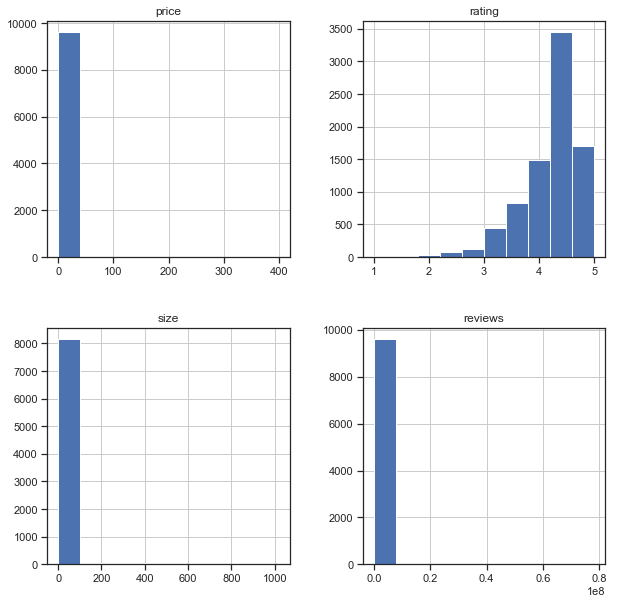

In [40]:
#Analyze numeric variables in df
#df.hist(figsize=(10,10));

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) # create 2x2 array of subplots

df.hist(column='price', ax=axes[0,0]) # add boxplot to 1st subplot
df.hist(column='rating', ax=axes[0,1])
df.hist(column='size', ax=axes[1,0])
df.hist(column='reviews', ax=axes[1,1], bins= 10)

plt.show()



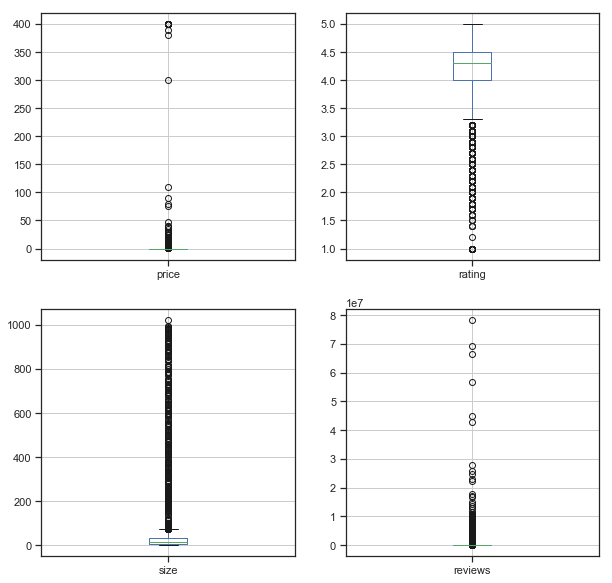

In [41]:
#Having the boxplot view
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) # create 2x2 array of subplots

df.boxplot(column='price', ax=axes[0,0]) # add boxplot to 1st subplot
df.boxplot(column='rating', ax=axes[0,1])
df.boxplot(column='size', ax=axes[1,0])
df.boxplot(column='reviews', ax=axes[1,1])
plt.show()

**Thoughts:**

- The size variable seems very widely distributed, both the histogramm and the boxplot are indicating this fact. It is also underlined by the large standard deviatio of 102.420382.

- Reviews are also widely distributed, while there are apps with 0 reviews, there are others with almost 80 million reviews. While 50% of the data has lower or equal to 969 reviews, 7% of the data has lower or equal to 29'453 reviews.  The data has a huge standard deviation of 1'831'430.

- Price shows a very interesting distribution. The 75% quantile is still at 0, which means 3/4 of the apps are for free. Only a minority of the apps cost money. The maximum price for an app is 400 USD.

- Rating variable has by far the lowest standard deviation of 0.536253, because its range is prefixed. Interestingly, the minimum AVERAGE rating received was 1 and the max AVERGAE received in average was 5. So there must be some really good and some really bad apps. The 25% quantile is 4.0, indicating that most apps (75%) score a higher rating than 4, which is very surprising.


**The dataset shows a huge variance and may be needed to be adjusted in the modelling section of this analysis**


In [42]:
#Analyze numeric variables in df_review
df_review.describe()


,sentiment_polarity,sentiment_subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


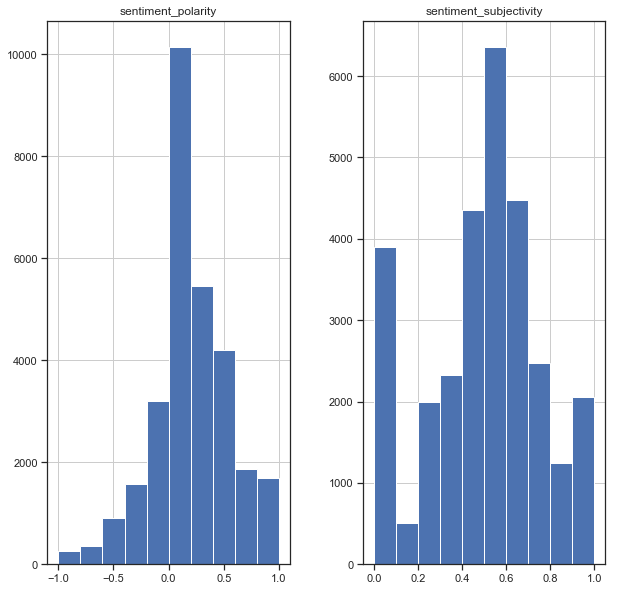

In [43]:
#Analyze numeric variables in df_review
df_review.hist(figsize=(10,10));

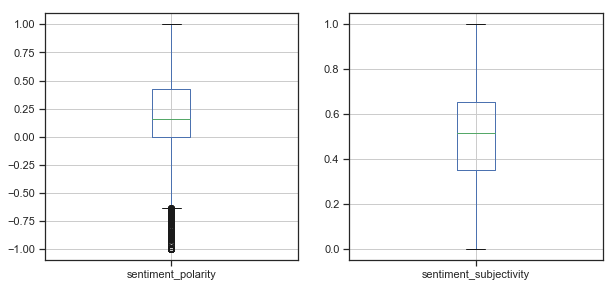

In [44]:
# Having the boxplot view
plt.figure(1, figsize=(10,10))

plt.subplot(221)
df_review.boxplot(column='sentiment_polarity')# add boxplot to 1st subplot

plt.subplot(222)
df_review.boxplot(column='sentiment_subjectivity')

plt.show();


**Thoughts:**

- The histogramm reveals that the sentiment polarity is skewed to the left, where the most values are located between 0 and 0.5. The IQR is also between 0 and 0.4225. The boxplot indicates that data below of approx. 0.65 is treated as outliers. The standard deviation is rather low (0.355672) as the range is limited from -1 to +1. 

- The histogramm of the sentiment subjectivity variable shows that we have many values between 0 and 0.1, as well as between 0.4 and 0.7. The 50% quantile is at 0.514286, indicating that the median is close to the middle of the range. The standard deviation is even lower to the sentiment polarity variable (0.266029), as the range is again lower 0 to 1.

In [144]:
"""#https://stackoverflow.com/questions/3627270/python-how-exactly-can-you-take-a-string-split-it-reverse-it-and-join-it-back

inst_num = []

for i in df.installs:
    inst_num.append(df.installs[1].replace('+',',').split(','))
    
clean_list = []
for i in inst_num:
    clean_list.append("".join(i))
#[0]+df.installs[1].split(',')[1]

df['installs_num'] = clean_list
df['installs_num'] = df['installs_num'].astype(int)
df['rating_weighted'] = df['rating']*df['installs_num']"""

### Checkout the individual apps

In [200]:
most_rev = df['reviews'].sort_values(ascending=False)[:10]
df.query('reviews == @most_rev').sort_values(by='reviews', ascending=False)

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2,installs_num,rating_weighted
2246,Facebook,SOCIAL,4.1,78158306,NaN,"1,000,000,000+",Free,0.0,Teen,2018-08-03,Varies with device,Varies with device,Social,None,5000000,20500000.0
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Communication,None,5000000,22000000.0
2305,Instagram,SOCIAL,4.5,66577446,NaN,"1,000,000,000+",Free,0.0,Teen,2018-07-31,Varies with device,Varies with device,Social,None,5000000,22500000.0
348,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device,Communication,None,5000000,20000000.0
1662,Clash of Clans,GAME,4.6,44893888,98.0,"100,000,000+",Free,0.0,Everyone 10+,2018-07-15,10.322.16,4.1 and up,Strategy,None,5000000,23000000.0
3558,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,"500,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Tools,None,5000000,23500000.0
1655,Subway Surfers,GAME,4.5,27725352,76.0,"1,000,000,000+",Free,0.0,Everyone 10+,2018-07-12,1.90.0,4.1 and up,Arcade,None,5000000,22500000.0
3239,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,"1,000,000,000+",Free,0.0,Teen,2018-08-02,Varies with device,Varies with device,Video Players & Editors,None,5000000,21500000.0
7061,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,"500,000,000+",Free,0.0,Everyone,2018-08-04,4.6.6,Varies with device,Tools,None,5000000,23500000.0
1661,Clash Royale,GAME,4.6,23136735,97.0,"100,000,000+",Free,0.0,Everyone 10+,2018-06-27,2.3.2,4.1 and up,Strategy,None,5000000,23000000.0


In [217]:
df_f = df.query('installs=="1,000,000+"').sort_values(by='rating', ascending=False)[:5]
df_e = df.query('installs=="10,000,000+"').sort_values(by='rating', ascending=False)[:5]
df_a = df.query('installs=="1,000,000,000+"').sort_values(by='rating', ascending=False)[:5]
df_b = df.query('installs=="500,000,000+"').sort_values(by='rating', ascending=False)[:5]
df_c = df.query('installs=="100,000,000+"').sort_values(by='rating', ascending=False)[:5]
df_d = df.query('installs=="50,000,000+"').sort_values(by='rating', ascending=False)[:5]

#dfratingbyinstalls
frames = [df_a, df_b, df_c, df_d, df_e, df_f]
df_ratinst = pd.concat(frames)

df_ratinst

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2,installs_num,rating_weighted
2305,Instagram,SOCIAL,4.5,66577446,NaN,"1,000,000,000+",Free,0.0,Teen,2018-07-31,Varies with device,Varies with device,Social,None,5000000,22500000.0
2533,Google Photos,PHOTOGRAPHY,4.5,10859051,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-06,Varies with device,Varies with device,Photography,None,5000000,22500000.0
1655,Subway Surfers,GAME,4.5,27725352,76.0,"1,000,000,000+",Free,0.0,Everyone 10+,2018-07-12,1.90.0,4.1 and up,Arcade,None,5000000,22500000.0
3102,Google Drive,PRODUCTIVITY,4.4,2731211,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-06,Varies with device,Varies with device,Productivity,None,5000000,22000000.0
2818,Google,TOOLS,4.4,8033493,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Tools,None,5000000,22000000.0
7061,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,"500,000,000+",Free,0.0,Everyone,2018-08-04,4.6.6,Varies with device,Tools,None,5000000,23500000.0
3558,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,"500,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Tools,None,5000000,23500000.0
2839,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17.0,"500,000,000+",Free,0.0,Everyone,2018-07-30,4.5.28_ww,4.1 and up,Tools,None,5000000,23000000.0
338,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,"500,000,000+",Free,0.0,Everyone,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Communication,None,5000000,23000000.0
383,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40.0,"500,000,000+",Free,0.0,Teen,2018-08-02,12.8.5.1121,4.0 and up,Communication,None,5000000,22500000.0


In [221]:
df.sort_values(by='price', ascending=False)[:20]

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2,installs_num,rating_weighted
3913,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",Paid,400.00,Everyone,2018-05-03,1.0.1,4.1 and up,Lifestyle,None,5000000,18000000.0
4896,I am Rich Plus,FAMILY,4.0,856,8.7,"10,000+",Paid,399.99,Everyone,2018-05-19,3.0,4.4 and up,Entertainment,None,5000000,20000000.0
3745,most expensive app (H),FAMILY,4.3,6,1.5,100+,Paid,399.99,Everyone,2018-07-16,1.0,7.0 and up,Entertainment,None,5000000,21500000.0
4915,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,"1,000+",Paid,399.99,Everyone,2018-06-25,1.0.2,4.1 and up,Finance,None,5000000,20000000.0
4911,I am Rich,FINANCE,4.3,180,3.8,"5,000+",Paid,399.99,Everyone,2018-03-22,1.0,4.2 and up,Finance,None,5000000,21500000.0
4906,I am rich (Most expensive app),FINANCE,4.1,129,2.7,"1,000+",Paid,399.99,Teen,2017-12-06,2,4.0.3 and up,Finance,None,5000000,20500000.0
4904,I Am Rich Pro,FAMILY,4.4,201,2.7,"5,000+",Paid,399.99,Everyone,2017-05-30,1.54,1.6 and up,Entertainment,None,5000000,22000000.0
4893,I am rich,LIFESTYLE,3.8,3547,1.8,"100,000+",Paid,399.99,Everyone,2018-01-12,2.0,4.0.3 and up,Lifestyle,None,5000000,19000000.0
4901,I am rich(premium),FINANCE,3.5,472,965.0,"5,000+",Paid,399.99,Everyone,2017-05-01,3.4,4.4 and up,Finance,None,5000000,17500000.0
4900,I am Rich!,FINANCE,3.8,93,22.0,"1,000+",Paid,399.99,Everyone,2017-12-11,1.0,4.1 and up,Finance,None,5000000,19000000.0


**Thoughts**:

Among the apps with the most reviews are the usual suspicious big social apps as Facebook, WhatsApp, Instagram and probably Facebook Messenger. After the big social apps, games and tools dominate the remaining top, as Clash of Clans, Clean Masterspace Cleaner & Antivirus, Subway Surfers, etc. Also YouTube can be found among the top 10.

By comparing the rating, depending on the installs of the app, we can see that Instagram, Google, Google Photos and Drive, Subway Surfers are among the best rated app with more than 1 Billion installs. The best voted app with more than 500 Mio. installs was Security Master - Antivirus, followed by Clean Masterspace Cleaner and SHAREit - Transfer & Share. With more than 100 Mio installs, we find Period Tracker as best rated app, followed by the Bible, Booking.com and Duolingo. With more than 50 Million installs, DU Recorder is best rated with a rating of 4.8, followed by Mercado Libre, Bowmaster and ZenUI Launcher. Six Pack in 30 Das, Period Tracker Clue and Abs Workout are best rated for app with more than 10 Mio. installs. With more than 1 Mio. installs StrongLifts 5x5, Pixpanda and Learn Japanese, Korean, Chinese Offline & Free are top rated. 

Interestingly the highest priced app seem to be apps without clear purpose. It seems like I'm rich and several versions and editions off it are prived between 300 and 400 USD. They are mostly rated very badly, but still have a high number of installs, some of them more than 100'000+. The first app that appear to have a function is BP Fitness Lead Scanner with a price of 109.99 USD.

### Explorting the Category variable

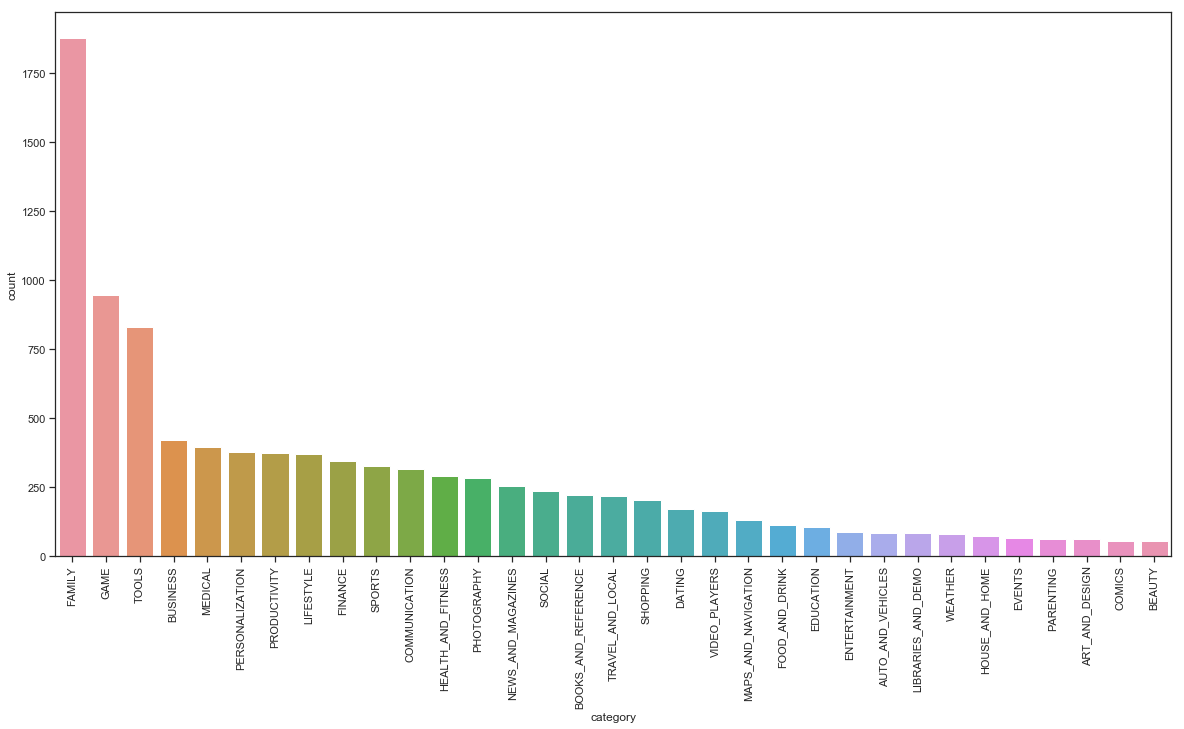

In [222]:
order = df['category'].value_counts().index.tolist()


plt.figure(figsize=(20,10))
sns.countplot(x="category", data=df, order=order)
plt.xticks(rotation=90)
plt.show();

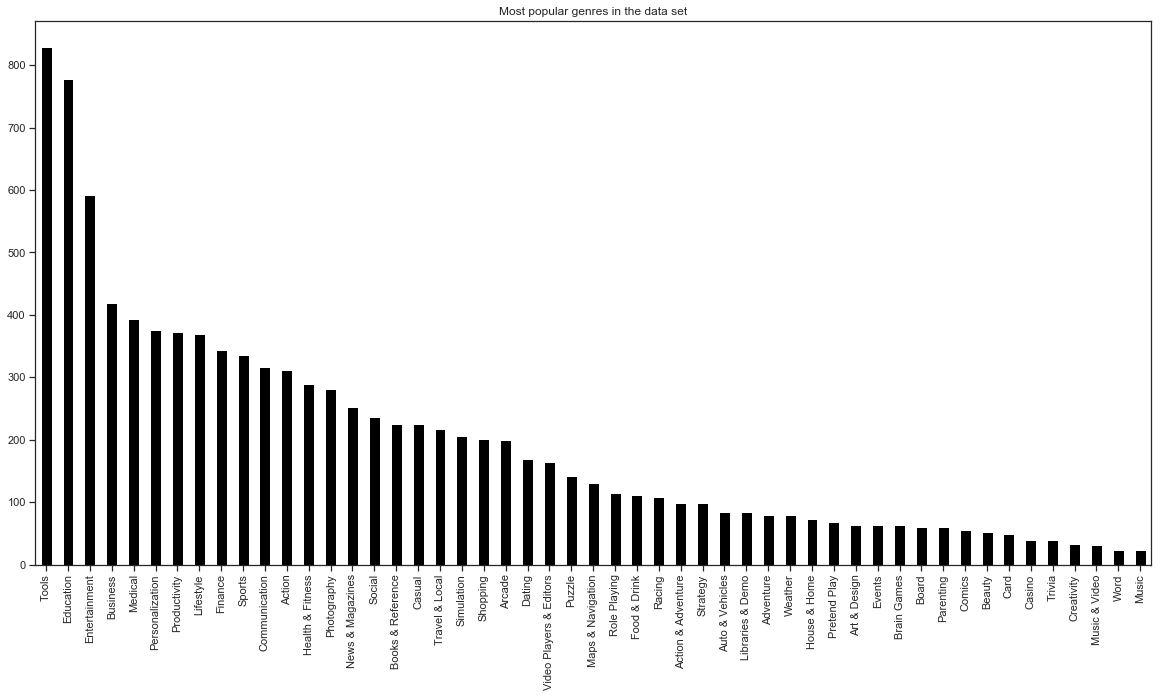

In [223]:
plt.figure(figsize=(20,10))

df[['genres_1', 'genres_2']].stack().value_counts()[1:].plot.bar(color='black');
plt.title('Most popular genres in the data set');
plt.show();

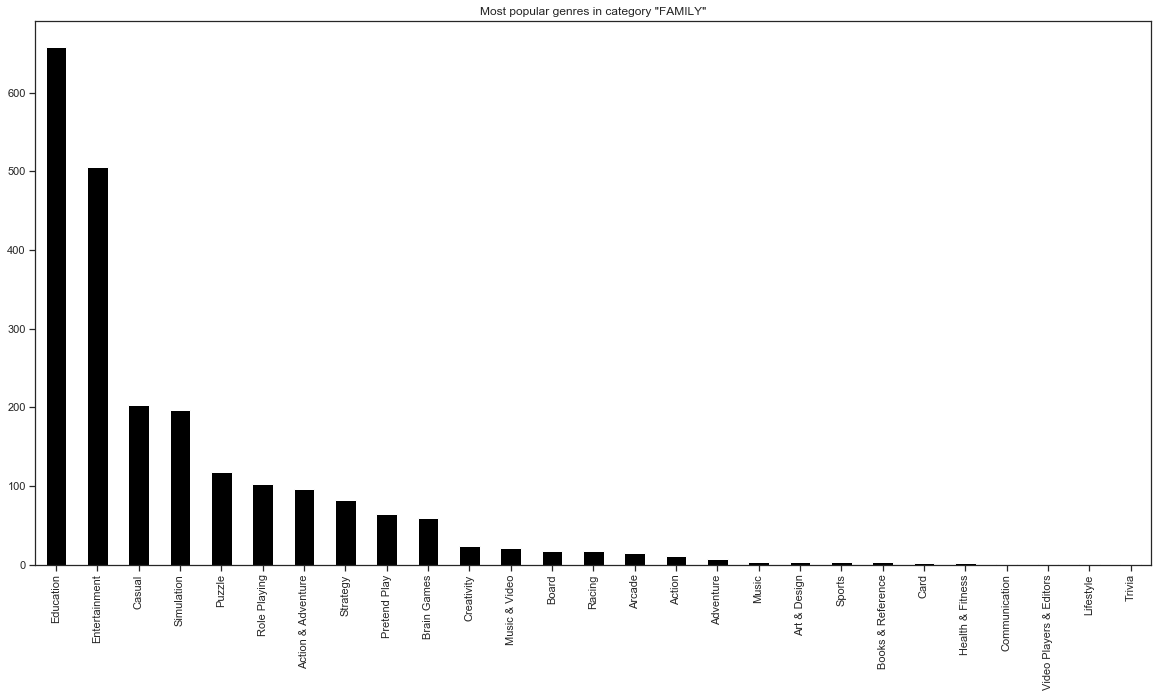

In [224]:
plt.figure(figsize=(20,10))

df.query('category=="FAMILY"')[['genres_1', 'genres_2']].stack().value_counts()[1:].plot.bar(color='black');
plt.title('Most popular genres in category "FAMILY"')
    
plt.show();

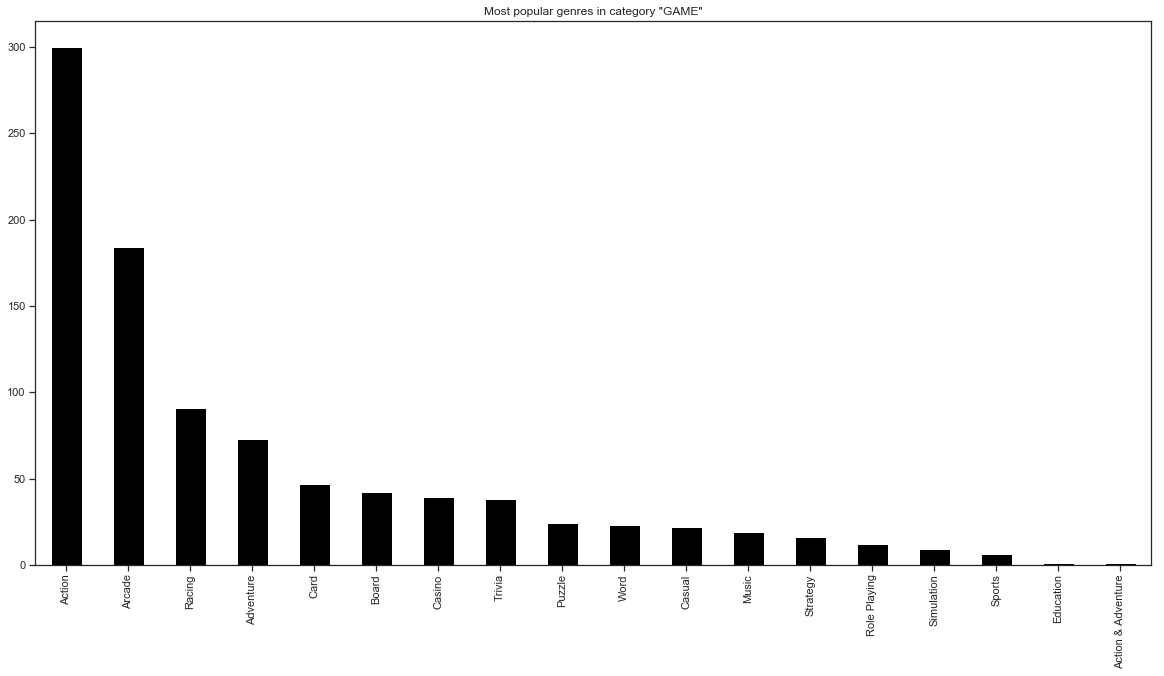

In [225]:
plt.figure(figsize=(20,10))

df.query('category=="GAME"')[['genres_1', 'genres_2']].stack().value_counts()[1:].plot.bar(color='black');
plt.title('Most popular genres in category "GAME"')
    
plt.show();

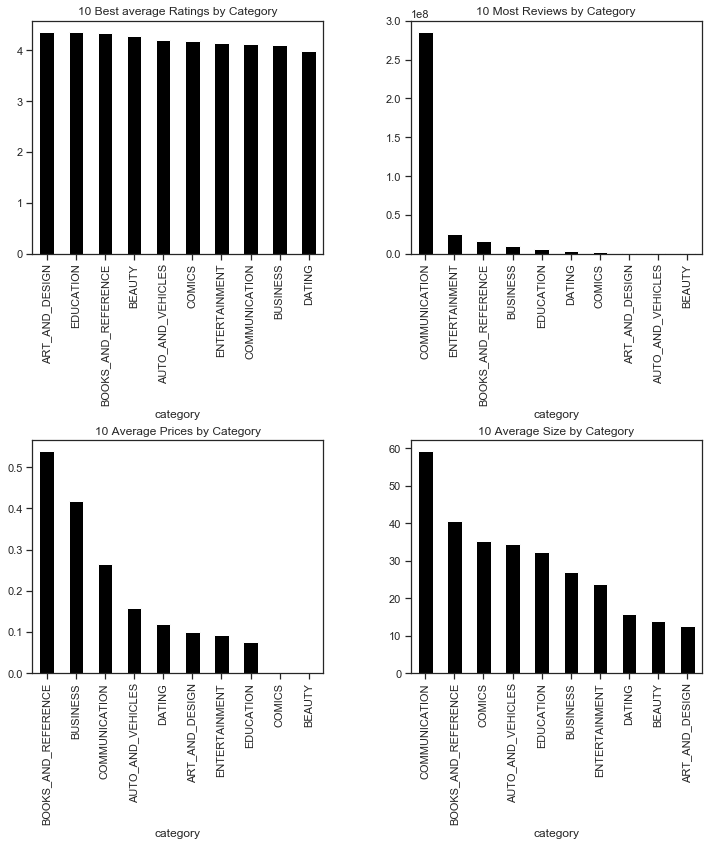

In [226]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12)) # create 2x2 array of subplots

df.groupby('category')['rating'].mean()[:10].sort_values(ascending=False).plot(kind='bar', 
                                                                          color='black', 
                                                                          title='10 Best average Ratings by Category', 
                                                                          ax=axes[0,0]) 

df.groupby('category')['reviews'].sum()[:10].sort_values(ascending=False).plot(kind='bar', 
                                                                          color='black', 
                                                                          title='10 Most Reviews by Category',
                                                                          ax=axes[0,1])

df.groupby('category')['price'].mean()[:10].sort_values(ascending=False).plot(kind='bar',
                                                                         color='black',
                                                                         title='10 Average Prices by Category',
                                                                         ax=axes[1,0])

df.groupby('category')['size'].mean()[:10].sort_values(ascending=False).plot(kind='bar', 
                                                                        color='black',
                                                                        title='10 Average Size by Category',
                                                                        ax=axes[1,1])
#plt.title('Average Size by Installs')



plt.subplots_adjust(hspace = 0.8, wspace=0.3)

plt.show()

**Thoughts:**

- Family, Game, Tool, Business and Medical are the 5 categories with most apps available. Family is by far the most popular category for apps with over 1750 apps in the data set, followed by game with approx. 900 installs and tools with approx. 800 insatlls. Within the Family category, Education and Entertainment are by far the 2 most popular genres with more than 500 (Entertainment) and 650 (Education) counts. Within the Gaming category, we can observe that action (300) and arcade (180) are the most popular genres. 

- Interestingly, Art and Design, Education  and Books_and_Reference score the highest average ratings among all app categories, whereas Communication gets by far the most reviews (approx. 280 Million), followed by Entertainment with approx. 20 Million reviews. 

- Books and Reference, Businness and Communication apps have the highest average prices per app (approx. 0.55, 0,4, 0.28)., while Comunnication, Books_and_Reference, comics and auto and vehicles have the largest average app size. 

### Explorting the Installation variable

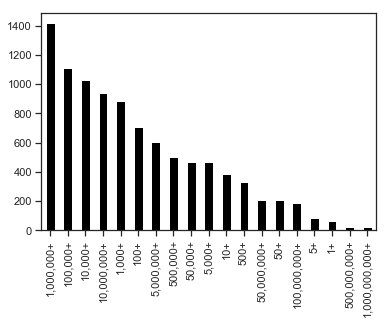

In [55]:
df.installs.value_counts().plot(kind='bar', color = 'black');

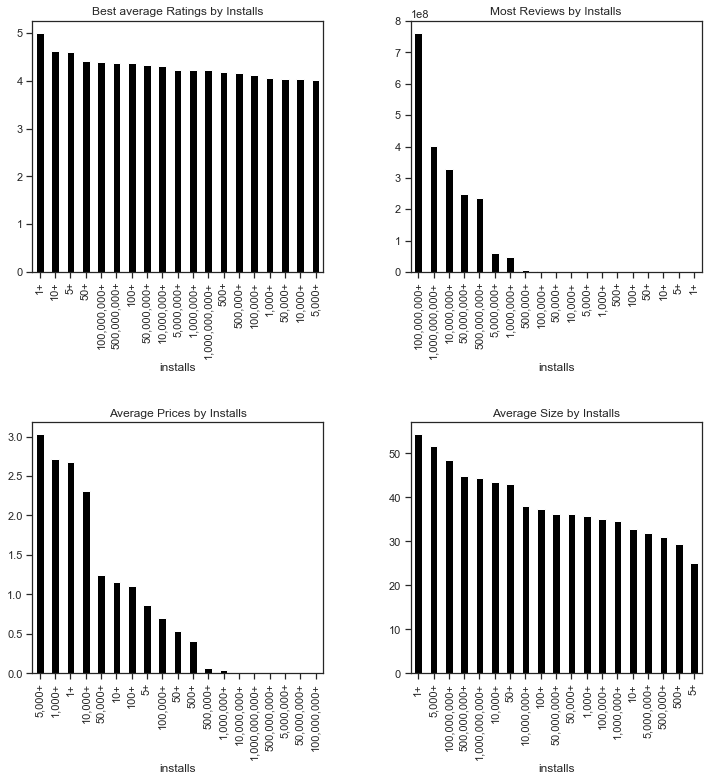

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12)) # create 2x2 array of subplots

df.groupby('installs')['rating'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                          color='black', 
                                                                          title='Best average Ratings by Installs', 
                                                                          ax=axes[0,0]) 

df.groupby('installs')['reviews'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                          color='black', 
                                                                          title='Most Reviews by Installs',
                                                                          ax=axes[0,1])

df.groupby('installs')['price'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                         color='black',
                                                                         title='Average Prices by Installs',
                                                                         ax=axes[1,0])

df.groupby('installs')['size'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                        color='black',
                                                                        title='Average Size by Installs',
                                                                        ax=axes[1,1])
#plt.title('Average Size by Installs')



plt.subplots_adjust(hspace = 0.6, wspace=0.3)

plt.show()

**Thoughts:**

- We can see that most apps in the Play Store have about 1 Mio. installs. Over 1'400 apps reach this level. This category is followed by 100'000+ and 10'000+ installs, which contain more than 1100 apps, resp. 1000 apps. On the other end of the chart, we can see that there are only a few apps who reach more than 1 Billion or 500 Million installs. 

- Interestingly, the best average ratings have apps between 1 and 50 installs. This may be due to the little number of installs or reviews from friends and family to push the app. More interesting is to observe that apps with 100+ Mio or 500+ Mio. installs score higher average ratings than apps with 100, 50'000 installs, etc. So these apps are being liked by many people. 

- We can observe that apps with a lot of installs have a lot of reviews too. It is intresting to see that apps with installs over 100 Mio have much more reviews (almost double) as apps with 1 Billion installs. The reason why may be the bigger number of apps in the 100 Mio category (about 10-15 more apps). 

- Interestingly apps with lower number of installs (up to 50'000) seem to have the highest average prices. These apps may follow a different strategy than apps with massive amounts of downloads, where the average price is equal to 0. While payed apps try to earn money with the sale of an app, bigger companies provide their app for free and engage their users a lot so they can place adwords there or offer some upsellings (e.g. Games). 

- The average size of an app is probably not that important in this case.


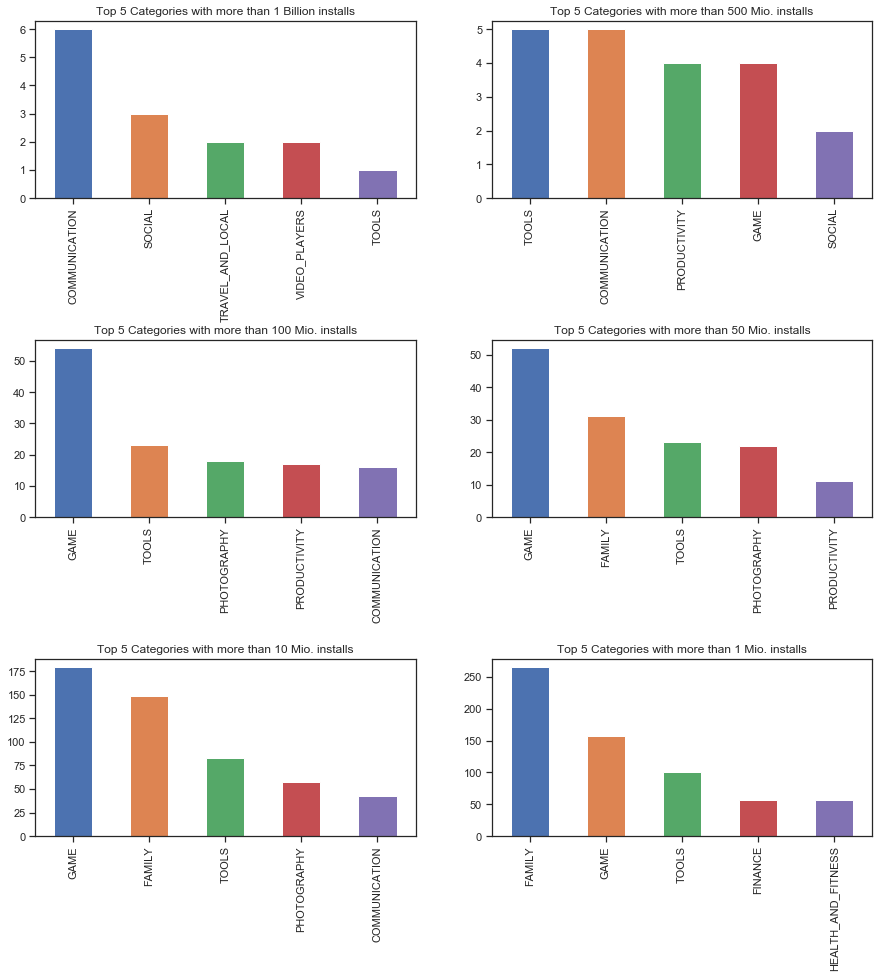

In [297]:
#df_ratinst.groupby('installs')['category'].value_counts()
#category by installs
df_f = df.query('installs=="1,000,000+"')#.groupby('installs')['category'].value_counts()
df_e = df.query('installs=="10,000,000+"')
df_a = df.query('installs=="1,000,000,000+"')
df_b = df.query('installs=="500,000,000+"')
df_c = df.query('installs=="100,000,000+"')
df_d = df.query('installs=="50,000,000+"')

inst = ['1,000,000+', '1,000,000,000+', '10,000,000+', '100,000,000+', '50,000,000+',  '500,000,000+']

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15)) # create 2x2 array of subplots


df_a.category.value_counts()[:5].plot(kind='bar',
                                      title='Top 5 Categories with more than 1 Billion installs',
                                      ax=axes[0,0])
df_b.category.value_counts()[:5].plot(kind='bar',
                                      title='Top 5 Categories with more than 500 Mio. installs',
                                      ax=axes[0,1])
df_c.category.value_counts()[:5].plot(kind='bar',
                                      title='Top 5 Categories with more than 100 Mio. installs',
                                      ax=axes[1,0])
df_d.category.value_counts()[:5].plot(kind='bar',
                                      title='Top 5 Categories with more than 50 Mio. installs',
                                      ax=axes[1,1])
df_e.category.value_counts()[:5].plot(kind='bar', 
                                      title='Top 5 Categories with more than 10 Mio. installs',
                                      ax=axes[2,0])
df_f.category.value_counts()[:5].plot(kind='bar', 
                                      title='Top 5 Categories with more than 1 Mio. installs',
                                      ax=axes[2,1])
plt.subplots_adjust(hspace=0.8)

**Thoughts:**

### Explorting the Type variable

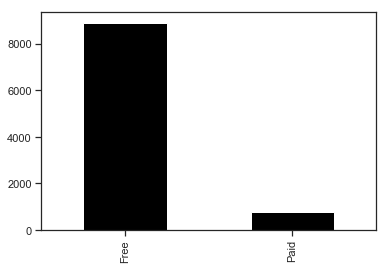

In [167]:
df.type.value_counts().sort_values(ascending=False).plot(kind='bar', color='black');

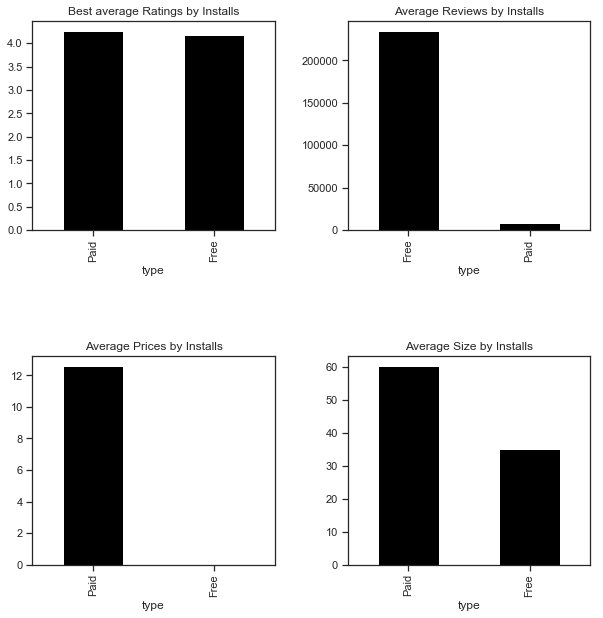

In [170]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) # create 2x2 array of subplots

df.groupby('type')['rating'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                          color='black', 
                                                                          title='Best average Ratings by Installs', 
                                                                          ax=axes[0,0]) 

df.groupby('type')['reviews'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                          color='black', 
                                                                          title='Average Reviews by Installs',
                                                                          ax=axes[0,1])

df.groupby('type')['price'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                         color='black',
                                                                         title='Average Prices by Installs',
                                                                         ax=axes[1,0])

df.groupby('type')['size'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                        color='black',
                                                                        title='Average Size by Installs',
                                                                        ax=axes[1,1])
#plt.title('Average Size by Installs')



plt.subplots_adjust(hspace = 0.6, wspace=0.3)

plt.show()

**Thoughts:**


# <span id="if">Inferential Satistics</span>

# <span id="findings">Main Findings</span>